# **NEURAL NETWORK IMPLEMENTATION**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing Libraries and loading data


In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


# Load the preprocessed dataset
preprocessed_path = "C:/Users/Roshan/Desktop/Neural Network Soft Computing Assignment/archive (2)/train.csv"
preprocessed_df = pd.read_csv(preprocessed_path)

# Extract features and target variable
X = preprocessed_df.drop('label', axis=1)
y = preprocessed_df['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode target variables
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# # Standardize features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Convert to NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
# for i in range(len(y_train)):
#     if y_train[i] >=6:
#         y_train[i] = 1
#     else:
#         y_train[i] = 0
        
# for i in range(len(y_test)):
#     if y_test[i] >=6:
#         y_test[i] = 1
#     else:
#         y_test[i] = 0
# Ensure y_train has the correct shape
y_train = y_train.reshape(-1, 1)
X_train


array([[ 34,  37,  44, ...,  49,  48,  58],
       [ 91,  95,  92, ...,  74, 121, 134],
       [208, 198, 164, ..., 163, 165, 157],
       ...,
       [107, 127, 117, ...,  34,  34,  34],
       [255, 255, 255, ...,  56,  59,  61],
       [187, 197, 200, ...,  95, 103, 106]], dtype=int64)

In [55]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


## Neural Network Implementation

In [74]:
# Convert labels to one-hot encoding
def one_hot_encoding(labels, num_classes):
    one_hot_labels = np.zeros((len(labels), num_classes))
    for i, label in enumerate(labels):
        one_hot_labels[i, label] = 1
#     print(one_hot_labels)
    return one_hot_labels


# Define neural network parameters
input_size = X_train.shape[1]
hidden_size = 10
output_size = len(np.unique(y_train))
learning_rate = 0.01
epochs = 5000

# # Initialize weights and biases
# np.random.seed(42)
# weights_input_hidden = np.random.randn(input_size, hidden_size)
# bias_hidden = np.zeros((1, hidden_size))
# weights_hidden_output = np.random.randn(hidden_size, output_size)
# bias_output = np.zeros((1, output_size))

# Initialize weights and biases for the first hidden layer
np.random.seed(42)
weights_input_hidden1 = np.random.rand(input_size, hidden_size)
#print(weights_input_hidden1)
bias_hidden1 = np.zeros((1, hidden_size))

# Initialize weights and biases for the second hidden layer
weights_hidden1_hidden2 = np.random.rand(hidden_size, hidden_size)
bias_hidden2 = np.zeros((1, hidden_size))

# Initialize weights and biases for the output layer
weights_hidden2_output = np.random.rand(hidden_size, output_size)
bias_output = np.zeros((1, output_size))

# Define activation functions
def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

# def leaky_relu(x, leaky_alpha=0.01):
#     return np.where(x > 0, x, leaky_alpha * x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)


In [75]:
print(input_size,output_size)
y_train

3072 10


array([[6],
       [2],
       [5],
       ...,
       [8],
       [8],
       [8]], dtype=int64)

## Training the Neural Network



---

Training when Sigmoid activation function is used

---



In [76]:
# # Convert labels to one-hot encoding
# num_classes = len(np.unique(y_train))
# print(y_train, num_classes)
# y_train_one_hot = one_hot_encoding(y_train, num_classes)
# y_test_one_hot = one_hot_encoding(y_test, num_classes)

# # Training the model
# training_losses = []
# training_accuracies = []
# test_losses = []
# test_accuracies = []

# train_precisions =[]
# train_recalls = []
# train_f1_scores = []
# test_precisions =[]
# test_recalls = []
# test_f1_scores = []

# result_filename = f'C:/Users/Roshan/Downloads/drive-download-20231129T114955Z-001/New folder/results{epochs}_lr{learning_rate}_Hidden_size{hidden_size}.txt'


# # Initialize parameters for RMSProp
# beta = 0.9
# epsilon = 1e-10

# r_hidden1 = np.zeros_like(weights_input_hidden1)
# # Manually assign dimensions to r_hidden1
# # r_hidden1 = np.zeros((5197, 8))
# # print(r_hidden1)
# r_hidden2 = np.zeros_like(weights_hidden1_hidden2)
# # r_hidden2 = np.zeros((5197, 8))
# # print(r_hidden2)
# r_output = np.zeros_like(weights_hidden2_output)
# # r_output = np.zeros((5197,3))


# for epoch in range(epochs):
#     # Forward propagation
#     # hidden_layer_input = np.dot(X_train, weights_input_hidden) + bias_hidden
#     # hidden_layer_output = sigmoid(hidden_layer_input)
#     # output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
#     # predicted_probabilities = softmax(output_layer_input)

#     hidden1_layer_input = np.dot(X_train, weights_input_hidden1) + bias_hidden1
#     hidden1_layer_output = sigmoid(hidden1_layer_input)

#     hidden2_layer_input = np.dot(hidden1_layer_output, weights_hidden1_hidden2) + bias_hidden2
#     hidden2_layer_output = sigmoid(hidden2_layer_input)

#     output_layer_input = np.dot(hidden2_layer_output, weights_hidden2_output) + bias_output
#     predicted_probabilities = softmax(output_layer_input)

#     # # Forward propagation for test set
#     # hidden_layer_input_test = np.dot(X_test, weights_input_hidden) + bias_hidden
#     # hidden_layer_output_test = sigmoid(hidden_layer_input_test)
#     # output_layer_input_test = np.dot(hidden_layer_output_test, weights_hidden_output) + bias_output
#     # predicted_probabilities_test = softmax(output_layer_input_test)

#     hidden1_layer_input_test = np.dot(X_test, weights_input_hidden1) + bias_hidden1
#     hidden1_layer_output_test = sigmoid(hidden1_layer_input_test)

#     hidden2_layer_input_test = np.dot(hidden1_layer_output_test, weights_hidden1_hidden2) + bias_hidden2
#     hidden2_layer_output_test = sigmoid(hidden2_layer_input_test)

#     output_layer_input_test = np.dot(hidden2_layer_output_test, weights_hidden2_output) + bias_output
#     predicted_probabilities_test = softmax(output_layer_input_test)

#     # Compute loss
#     loss = -np.mean(np.sum(y_train_one_hot * np.log(predicted_probabilities + epsilon), axis=1))
#     training_losses.append(loss)
#     # Compute test loss
#     test_loss = -np.mean(np.sum(y_test_one_hot * np.log(predicted_probabilities_test + epsilon), axis=1))
#     test_losses.append(test_loss)

#     # Backward propagation
#     d_output = predicted_probabilities - y_train_one_hot
#     # print(d_output.shape)
#     d_hidden2 = np.dot(d_output, weights_hidden2_output.T) * (hidden2_layer_output * (1 - hidden2_layer_output))
#     # print(d_hidden2.shape)
#     d_hidden1 = np.dot(d_hidden2, weights_hidden1_hidden2.T) * (hidden1_layer_output * (1 - hidden1_layer_output))
#     # print(d_hidden1.shape)

#     # Update weights and biases with RMSProp
#     r_hidden1 = beta * r_hidden1 + ((1 - beta) * np.mean(np.square(d_hidden1), axis=0, keepdims=True))

#     r_hidden2 = beta * r_hidden2 + ((1 - beta) * np.mean(np.square(d_hidden2), axis=0, keepdims =True))
#     r_output = beta * r_output + ((1 - beta) * np.mean(np.square(d_output), axis =0, keepdims = True))

#     # Update weights and biases with RMSProp
#     weights_hidden2_output -= learning_rate * np.dot(hidden2_layer_output.T, d_output) / (np.sqrt(r_output) + epsilon)
#     # bias_output -= learning_rate * np.mean(d_output, axis=0, keepdims=True) / (np.sqrt(r_output) + epsilon)

#     weights_hidden1_hidden2 -= learning_rate * np.dot(hidden1_layer_output.T, d_hidden2) / (np.sqrt(r_hidden2) + epsilon)
#     # bias_hidden2 -= learning_rate * np.mean(d_hidden2, axis=0, keepdims=True) / (np.sqrt(r_hidden2) + epsilon)

#     weights_input_hidden1 -= learning_rate * np.dot(X_train.T, d_hidden1) / (np.sqrt(r_hidden1) + epsilon)
#     # bias_hidden1 -= learning_rate * np.mean(d_hidden1, axis=0, keepdims=True) / (np.sqrt(r_hidden1) + epsilon)





#     # Calculate training accuracy
#     train_predictions = np.argmax(predicted_probabilities, axis=1)

#     train_accuracy = np.mean(train_predictions == y_train)

#     training_accuracies.append(train_accuracy)
#     train_precision = precision_score(y_train, train_predictions, average='weighted', zero_division=1.0)
#     train_precisions.append(train_precision)
#     train_recall = recall_score(y_train, train_predictions, average='weighted', zero_division=1.0)
#     train_recalls.append(train_recall)
#     train_f1 = f1_score(y_train, train_predictions, average='weighted', zero_division=1.0)
#     train_f1_scores.append(train_f1)


#      # Calculate test accuracy
#     test_predictions = np.argmax(predicted_probabilities_test, axis=1)
#     test_accuracy = np.mean(test_predictions == y_test)
#     test_accuracies.append(test_accuracy)
#     test_precision = precision_score(y_test, test_predictions, average='weighted', zero_division=1.0)
#     test_precisions.append(test_precision)
#     test_recall = recall_score(y_test, test_predictions, average='weighted', zero_division=1.0)
#     test_recalls.append(test_recall)
#     test_f1 = f1_score(y_test, test_predictions, average='weighted', zero_division=1.0)
#     test_f1_scores.append(test_f1)

#      # Print the loss and accuracy for every 5 epochs
#     if (epoch + 1) % 100 == 0:
#         result_line = (f'Epoch {epoch + 1}/{epochs}, '
#                    f'Training Loss: {loss}, Training Accuracy: {train_accuracy * 100:.2f}%, '
#                    f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy * 100:.2f}%')
#         print(result_line)
#         # Save the result to the file
#         with open(result_filename, 'a') as result_file:
#           result_file.write(result_line + '\n')




---
Training when TanH activation function is used

---




In [ ]:
  # Convert labels to one-hot encoding
num_classes = len(np.unique(y_train))
y_train_one_hot = one_hot_encoding(y_train, num_classes)
y_test_one_hot = one_hot_encoding(y_test, num_classes)

# Training the model using tanh activation function
training_losses = []
training_accuracies = []
test_losses = []
test_accuracies = []
train_precisions =[]
train_recalls = []
train_f1_scores = []
test_precisions =[]
test_recalls = []
test_f1_scores = []

# result_filename = '/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/RMS Prop/Hidden Layer  - tanh/results.txt'

for epoch in range(epochs):
    # Forward propagation
    # hidden_layer_input = np.dot(X_train, weights_input_hidden) + bias_hidden
    # hidden_layer_output = sigmoid(hidden_layer_input)
    # output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    # predicted_probabilities = softmax(output_layer_input)

    hidden1_layer_input = np.dot(X_train, weights_input_hidden1) + bias_hidden1
    hidden1_layer_output = tanh(hidden1_layer_input)

    hidden2_layer_input = np.dot(hidden1_layer_output, weights_hidden1_hidden2) + bias_hidden2
    hidden2_layer_output = tanh(hidden2_layer_input)

    output_layer_input = np.dot(hidden2_layer_output, weights_hidden2_output) + bias_output
    predicted_probabilities = softmax(output_layer_input)

    # # Forward propagation for test set
    # hidden_layer_input_test = np.dot(X_test, weights_input_hidden) + bias_hidden
    # hidden_layer_output_test = sigmoid(hidden_layer_input_test)
    # output_layer_input_test = np.dot(hidden_layer_output_test, weights_hidden_output) + bias_output
    # predicted_probabilities_test = softmax(output_layer_input_test)

    hidden1_layer_input_test = np.dot(X_test, weights_input_hidden1) + bias_hidden1
    hidden1_layer_output_test = tanh(hidden1_layer_input_test)

    hidden2_layer_input_test = np.dot(hidden1_layer_output_test, weights_hidden1_hidden2) + bias_hidden2
    hidden2_layer_output_test = tanh(hidden2_layer_input_test)

    output_layer_input_test = np.dot(hidden2_layer_output_test, weights_hidden2_output) + bias_output
    predicted_probabilities_test = softmax(output_layer_input_test)

    # Compute loss
    loss = -np.mean(np.sum(y_train_one_hot * np.log(predicted_probabilities+epsilon), axis=1))
    training_losses.append(loss)
    # Compute test loss
    test_loss = -np.mean(np.sum(y_test_one_hot * np.log(predicted_probabilities_test + epsilon), axis=1))
    test_losses.append(test_loss)

    # # Backward propagation
    # d_output = predicted_probabilities - y_train_one_hot
    # d_hidden = np.dot(d_output, weights_hidden_output.T) * (hidden_layer_output * (1 - hidden_layer_output))

    d_output = predicted_probabilities - y_train_one_hot
    d_hidden2 = np.dot(d_output, weights_hidden2_output.T) * (hidden2_layer_output * (1 - hidden2_layer_output))
    d_hidden1 = np.dot(d_hidden2, weights_hidden1_hidden2.T) * (hidden1_layer_output * (1 - hidden1_layer_output))


    # # Update weights and biases
    # weights_hidden_output -= learning_rate * np.dot(hidden_layer_output.T, d_output)
    # bias_output -= learning_rate * np.sum(d_output, axis=0, keepdims=True)
    # weights_input_hidden -= learning_rate * np.dot(X_train.T, d_hidden)
    # bias_hidden -= learning_rate * np.sum(d_hidden, axis=0, keepdims=True)

    # Update weights and biases
    weights_hidden2_output -= learning_rate * np.dot(hidden2_layer_output.T, d_output)
    bias_output -= learning_rate * np.sum(d_output, axis=0, keepdims=True)

    weights_hidden1_hidden2 -= learning_rate * np.dot(hidden1_layer_output.T, d_hidden2)
    bias_hidden2 -= learning_rate * np.sum(d_hidden2, axis=0, keepdims=True)

    weights_input_hidden1 -= learning_rate * np.dot(X_train.T, d_hidden1)
    bias_hidden1 -= learning_rate * np.sum(d_hidden1, axis=0, keepdims=True)


    # Calculate training accuracy
    train_predictions = np.argmax(predicted_probabilities, axis=1)
    train_accuracy = np.mean(train_predictions == y_train)
    training_accuracies.append(train_accuracy)
    training_accuracies.append(train_accuracy)
    train_precision = precision_score(y_train, train_predictions, average='weighted', zero_division=1.0)
    train_precisions.append(train_precision)
    train_recall = recall_score(y_train, train_predictions, average='weighted', zero_division=1.0)
    train_recalls.append(train_recall)
    train_f1 = f1_score(y_train, train_predictions, average='weighted', zero_division=1.0)
    train_f1_scores.append(train_f1)
     # Calculate test accuracy
    test_predictions = np.argmax(predicted_probabilities_test, axis=1)
    test_accuracy = np.mean(test_predictions == y_test)
    test_accuracies.append(test_accuracy)
    test_precision = precision_score(y_test, test_predictions, average='weighted', zero_division=1.0)
    test_precisions.append(test_precision)
    test_recall = recall_score(y_test, test_predictions, average='weighted', zero_division=1.0)
    test_recalls.append(test_recall)
    test_f1 = f1_score(y_test, test_predictions, average='weighted', zero_division=1.0)
    test_f1_scores.append(test_f1)




# ...

    # Inside your training loop
    if (epoch + 1) % 1 == 0:
      result_line = (f'Epoch {epoch + 1}/{epochs}, '
                   f'Training Loss: {loss}, Training Accuracy: {train_accuracy * 100:.2f}%, '
                   f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy * 100:.2f}%')
      print(result_line)
      # Save the result to the file
#       with open(result_filename, 'a') as result_file:
#         result_file.write(result_line + '\n')


Epoch 1/5000, Training Loss: 2.5485490286663137, Training Accuracy: 10.01%, Test Loss: 2.554827273270685, Test Accuracy: 9.96%
Epoch 2/5000, Training Loss: 16.484348158699916, Training Accuracy: 9.96%, Test Loss: 16.442257586217632, Test Accuracy: 10.17%
Epoch 3/5000, Training Loss: 16.586441457877562, Training Accuracy: 9.96%, Test Loss: 16.547297511275413, Test Accuracy: 10.17%
Epoch 4/5000, Training Loss: 15.758082133731694, Training Accuracy: 10.01%, Test Loss: 15.725944355017866, Test Accuracy: 9.96%
Epoch 5/5000, Training Loss: 16.27492455530751, Training Accuracy: 9.90%, Test Loss: 16.209353351726598, Test Accuracy: 10.40%
Epoch 6/5000, Training Loss: 16.54775802829426, Training Accuracy: 10.17%, Test Loss: 16.702031229608618, Test Accuracy: 9.33%
Epoch 7/5000, Training Loss: 16.5924281791226, Training Accuracy: 9.93%, Test Loss: 16.523350626295272, Test Accuracy: 10.30%
Epoch 8/5000, Training Loss: 16.566178709048216, Training Accuracy: 10.07%, Test Loss: 16.6283485065928, Test

Epoch 65/5000, Training Loss: 16.54775802829426, Training Accuracy: 10.17%, Test Loss: 16.702031229608618, Test Accuracy: 9.33%
Epoch 66/5000, Training Loss: 16.589204559990655, Training Accuracy: 9.94%, Test Loss: 16.53624510282304, Test Accuracy: 10.23%
Epoch 67/5000, Training Loss: 16.576770600324018, Training Accuracy: 10.01%, Test Loss: 16.585980940706282, Test Accuracy: 9.96%
Epoch 68/5000, Training Loss: 16.566178709048216, Training Accuracy: 10.07%, Test Loss: 16.6283485065928, Test Accuracy: 9.73%
Epoch 69/5000, Training Loss: 16.56894181116131, Training Accuracy: 10.05%, Test Loss: 16.61729609814043, Test Accuracy: 9.79%
Epoch 70/5000, Training Loss: 16.597033349311083, Training Accuracy: 9.90%, Test Loss: 16.50492994554132, Test Accuracy: 10.40%
Epoch 71/5000, Training Loss: 16.585520423839863, Training Accuracy: 9.96%, Test Loss: 16.5509816474262, Test Accuracy: 10.15%
Epoch 72/5000, Training Loss: 16.5924281791226, Training Accuracy: 9.93%, Test Loss: 16.523350626295272, T

Epoch 129/5000, Training Loss: 16.56894181116131, Training Accuracy: 10.05%, Test Loss: 16.61729609814043, Test Accuracy: 9.79%
Epoch 130/5000, Training Loss: 16.585520423819787, Training Accuracy: 9.96%, Test Loss: 16.550981647405113, Test Accuracy: 10.15%
Epoch 131/5000, Training Loss: 16.597033349311083, Training Accuracy: 9.90%, Test Loss: 16.50492994554132, Test Accuracy: 10.40%
Epoch 132/5000, Training Loss: 16.5924281791226, Training Accuracy: 9.93%, Test Loss: 16.523350626295272, Test Accuracy: 10.30%
Epoch 133/5000, Training Loss: 16.586441457877562, Training Accuracy: 9.96%, Test Loss: 16.547297511275413, Test Accuracy: 10.17%
Epoch 134/5000, Training Loss: 16.575849566444038, Training Accuracy: 10.02%, Test Loss: 16.589665077009506, Test Accuracy: 9.94%
Epoch 135/5000, Training Loss: 16.54775802829426, Training Accuracy: 10.17%, Test Loss: 16.702031229608618, Test Accuracy: 9.33%
Epoch 136/5000, Training Loss: 16.56617870904701, Training Accuracy: 10.07%, Test Loss: 16.62834

Epoch 193/5000, Training Loss: 16.586441457877562, Training Accuracy: 9.96%, Test Loss: 16.547297511275413, Test Accuracy: 10.17%
Epoch 194/5000, Training Loss: 16.575849566444038, Training Accuracy: 10.02%, Test Loss: 16.589665077009506, Test Accuracy: 9.94%
Epoch 195/5000, Training Loss: 16.54775802829426, Training Accuracy: 10.17%, Test Loss: 16.702031229608618, Test Accuracy: 9.33%
Epoch 196/5000, Training Loss: 16.56894181116131, Training Accuracy: 10.05%, Test Loss: 16.61729609814043, Test Accuracy: 9.79%
Epoch 197/5000, Training Loss: 16.566178709048216, Training Accuracy: 10.07%, Test Loss: 16.6283485065928, Test Accuracy: 9.73%
Epoch 198/5000, Training Loss: 16.589204559990655, Training Accuracy: 9.94%, Test Loss: 16.53624510282304, Test Accuracy: 10.23%
Epoch 199/5000, Training Loss: 16.57677060048174, Training Accuracy: 10.01%, Test Loss: 16.585980940858715, Test Accuracy: 9.96%
Epoch 200/5000, Training Loss: 16.585520423839863, Training Accuracy: 9.96%, Test Loss: 16.550981

Epoch 257/5000, Training Loss: 16.566178709048216, Training Accuracy: 10.07%, Test Loss: 16.6283485065928, Test Accuracy: 9.73%
Epoch 258/5000, Training Loss: 16.589204559990655, Training Accuracy: 9.94%, Test Loss: 16.53624510282304, Test Accuracy: 10.23%
Epoch 259/5000, Training Loss: 16.57677060048174, Training Accuracy: 10.01%, Test Loss: 16.585980940858715, Test Accuracy: 9.96%
Epoch 260/5000, Training Loss: 16.585520423839863, Training Accuracy: 9.96%, Test Loss: 16.5509816474262, Test Accuracy: 10.15%
Epoch 261/5000, Training Loss: 16.597033349311083, Training Accuracy: 9.90%, Test Loss: 16.50492994554132, Test Accuracy: 10.40%
Epoch 262/5000, Training Loss: 16.5924281791226, Training Accuracy: 9.93%, Test Loss: 16.523350626295272, Test Accuracy: 10.30%
Epoch 263/5000, Training Loss: 16.54775802829426, Training Accuracy: 10.17%, Test Loss: 16.702031229608618, Test Accuracy: 9.33%
Epoch 264/5000, Training Loss: 16.575849566444038, Training Accuracy: 10.02%, Test Loss: 16.58966507

Epoch 321/5000, Training Loss: 16.597033349311083, Training Accuracy: 9.90%, Test Loss: 16.50492994554132, Test Accuracy: 10.40%
Epoch 322/5000, Training Loss: 16.48676093638864, Training Accuracy: 10.17%, Test Loss: 16.6387294615827, Test Accuracy: 9.33%
Epoch 323/5000, Training Loss: 16.5924281791226, Training Accuracy: 9.93%, Test Loss: 16.523350626295272, Test Accuracy: 10.30%
Epoch 324/5000, Training Loss: 16.575849566444038, Training Accuracy: 10.02%, Test Loss: 16.589665077009506, Test Accuracy: 9.94%
Epoch 325/5000, Training Loss: 16.586441457877562, Training Accuracy: 9.96%, Test Loss: 16.547297511275413, Test Accuracy: 10.17%
Epoch 326/5000, Training Loss: 16.56894181116131, Training Accuracy: 10.05%, Test Loss: 16.61729609814043, Test Accuracy: 9.79%
Epoch 327/5000, Training Loss: 16.566178709048216, Training Accuracy: 10.07%, Test Loss: 16.6283485065928, Test Accuracy: 9.73%
Epoch 328/5000, Training Loss: 15.324693529755713, Training Accuracy: 10.01%, Test Loss: 15.29768843

Epoch 385/5000, Training Loss: 16.56894181116131, Training Accuracy: 10.05%, Test Loss: 16.61729609814043, Test Accuracy: 9.79%
Epoch 386/5000, Training Loss: 15.701281249306595, Training Accuracy: 9.96%, Test Loss: 15.691811520820007, Test Accuracy: 10.17%
Epoch 387/5000, Training Loss: 16.566178709048216, Training Accuracy: 10.07%, Test Loss: 16.6283485065928, Test Accuracy: 9.73%
Epoch 388/5000, Training Loss: 16.57677060048174, Training Accuracy: 10.01%, Test Loss: 16.585980940858715, Test Accuracy: 9.96%
Epoch 389/5000, Training Loss: 16.589204559990655, Training Accuracy: 9.94%, Test Loss: 16.53624510282304, Test Accuracy: 10.23%
Epoch 390/5000, Training Loss: 16.585520423839863, Training Accuracy: 9.96%, Test Loss: 16.5509816474262, Test Accuracy: 10.15%
Epoch 391/5000, Training Loss: 16.597033349311083, Training Accuracy: 9.90%, Test Loss: 16.50492994554132, Test Accuracy: 10.40%
Epoch 392/5000, Training Loss: 16.54775802829426, Training Accuracy: 10.17%, Test Loss: 16.70203122

Epoch 449/5000, Training Loss: 16.589204559990655, Training Accuracy: 9.94%, Test Loss: 16.53624510282304, Test Accuracy: 10.23%
Epoch 450/5000, Training Loss: 16.585520423839863, Training Accuracy: 9.96%, Test Loss: 16.5509816474262, Test Accuracy: 10.15%
Epoch 451/5000, Training Loss: 16.54775802829426, Training Accuracy: 10.17%, Test Loss: 16.702031229608618, Test Accuracy: 9.33%
Epoch 452/5000, Training Loss: 16.597033349311083, Training Accuracy: 9.90%, Test Loss: 16.50492994554132, Test Accuracy: 10.40%
Epoch 453/5000, Training Loss: 16.5924281791226, Training Accuracy: 9.93%, Test Loss: 16.523350626295272, Test Accuracy: 10.30%
Epoch 454/5000, Training Loss: 16.575849566444038, Training Accuracy: 10.02%, Test Loss: 16.589665077009506, Test Accuracy: 9.94%
Epoch 455/5000, Training Loss: 16.56894181116131, Training Accuracy: 10.05%, Test Loss: 16.61729609814043, Test Accuracy: 9.79%
Epoch 456/5000, Training Loss: 16.566178709048216, Training Accuracy: 10.07%, Test Loss: 16.6283485

Epoch 513/5000, Training Loss: 15.128494712346306, Training Accuracy: 10.02%, Test Loss: 15.087523263391194, Test Accuracy: 9.94%
Epoch 514/5000, Training Loss: 16.56894181106404, Training Accuracy: 10.05%, Test Loss: 16.617296098039493, Test Accuracy: 9.79%
Epoch 515/5000, Training Loss: 16.592264457303845, Training Accuracy: 9.93%, Test Loss: 16.52319239304022, Test Accuracy: 10.30%
Epoch 516/5000, Training Loss: 16.566178709048216, Training Accuracy: 10.07%, Test Loss: 16.6283485065928, Test Accuracy: 9.73%
Epoch 517/5000, Training Loss: 16.586441457877562, Training Accuracy: 9.96%, Test Loss: 16.547297511275413, Test Accuracy: 10.17%
Epoch 518/5000, Training Loss: 16.57677060048174, Training Accuracy: 10.01%, Test Loss: 16.585980940858715, Test Accuracy: 9.96%
Epoch 519/5000, Training Loss: 16.569445498964463, Training Accuracy: 9.94%, Test Loss: 16.51811360155596, Test Accuracy: 10.23%
Epoch 520/5000, Training Loss: 16.54775802829426, Training Accuracy: 10.17%, Test Loss: 16.70203

Epoch 577/5000, Training Loss: 16.586441457877562, Training Accuracy: 9.96%, Test Loss: 16.547297511275413, Test Accuracy: 10.17%
Epoch 578/5000, Training Loss: 16.57677060048174, Training Accuracy: 10.01%, Test Loss: 16.585980940858715, Test Accuracy: 9.96%
Epoch 579/5000, Training Loss: 16.54775802829426, Training Accuracy: 10.17%, Test Loss: 16.702031229608618, Test Accuracy: 9.33%
Epoch 580/5000, Training Loss: 16.589204559990655, Training Accuracy: 9.94%, Test Loss: 16.53624510282304, Test Accuracy: 10.23%
Epoch 581/5000, Training Loss: 16.585520423839863, Training Accuracy: 9.96%, Test Loss: 16.5509816474262, Test Accuracy: 10.15%
Epoch 582/5000, Training Loss: 16.597033349311083, Training Accuracy: 9.90%, Test Loss: 16.50492994554132, Test Accuracy: 10.40%
Epoch 583/5000, Training Loss: 16.57584956644403, Training Accuracy: 10.02%, Test Loss: 16.589665077009496, Test Accuracy: 9.94%
Epoch 584/5000, Training Loss: 16.56858999172844, Training Accuracy: 10.05%, Test Loss: 16.616956

Epoch 641/5000, Training Loss: 16.585520423839863, Training Accuracy: 9.96%, Test Loss: 16.5509816474262, Test Accuracy: 10.15%
Epoch 642/5000, Training Loss: 16.56894181116131, Training Accuracy: 10.05%, Test Loss: 16.61729609814043, Test Accuracy: 9.79%
Epoch 643/5000, Training Loss: 16.566178709048216, Training Accuracy: 10.07%, Test Loss: 16.6283485065928, Test Accuracy: 9.73%
Epoch 644/5000, Training Loss: 16.597033349311083, Training Accuracy: 9.90%, Test Loss: 16.50492994554132, Test Accuracy: 10.40%
Epoch 645/5000, Training Loss: 16.5924281791226, Training Accuracy: 9.93%, Test Loss: 16.523350626295272, Test Accuracy: 10.30%
Epoch 646/5000, Training Loss: 16.586441327669146, Training Accuracy: 9.96%, Test Loss: 16.547297382042096, Test Accuracy: 10.17%
Epoch 647/5000, Training Loss: 16.575849566444038, Training Accuracy: 10.02%, Test Loss: 16.589665077009506, Test Accuracy: 9.94%
Epoch 648/5000, Training Loss: 16.57677060048174, Training Accuracy: 10.01%, Test Loss: 16.58598094

Epoch 705/5000, Training Loss: 16.5924281791226, Training Accuracy: 9.93%, Test Loss: 16.523350626295272, Test Accuracy: 10.30%
Epoch 706/5000, Training Loss: 16.575849566444038, Training Accuracy: 10.02%, Test Loss: 16.589665077009506, Test Accuracy: 9.94%
Epoch 707/5000, Training Loss: 16.586441457877562, Training Accuracy: 9.96%, Test Loss: 16.547297511275413, Test Accuracy: 10.17%
Epoch 708/5000, Training Loss: 16.57677060048174, Training Accuracy: 10.01%, Test Loss: 16.585980940858715, Test Accuracy: 9.96%
Epoch 709/5000, Training Loss: 16.54775802829426, Training Accuracy: 10.17%, Test Loss: 16.702031229608618, Test Accuracy: 9.33%
Epoch 710/5000, Training Loss: 16.539580342621008, Training Accuracy: 9.94%, Test Loss: 16.4879167180732, Test Accuracy: 10.23%
Epoch 711/5000, Training Loss: 16.56894181116131, Training Accuracy: 10.05%, Test Loss: 16.61729609814043, Test Accuracy: 9.79%
Epoch 712/5000, Training Loss: 16.585520423839863, Training Accuracy: 9.96%, Test Loss: 16.5509816

Epoch 769/5000, Training Loss: 16.586441457877562, Training Accuracy: 9.96%, Test Loss: 16.547297511275413, Test Accuracy: 10.17%
Epoch 770/5000, Training Loss: 16.56894181116131, Training Accuracy: 10.05%, Test Loss: 16.61729609814043, Test Accuracy: 9.79%
Epoch 771/5000, Training Loss: 16.589204559990655, Training Accuracy: 9.94%, Test Loss: 16.53624510282304, Test Accuracy: 10.23%
Epoch 772/5000, Training Loss: 16.585520423839863, Training Accuracy: 9.96%, Test Loss: 16.5509816474262, Test Accuracy: 10.15%
Epoch 773/5000, Training Loss: 16.566178709048216, Training Accuracy: 10.07%, Test Loss: 16.6283485065928, Test Accuracy: 9.73%
Epoch 774/5000, Training Loss: 16.597033349311083, Training Accuracy: 9.90%, Test Loss: 16.50492994554132, Test Accuracy: 10.40%
Epoch 775/5000, Training Loss: 16.54775802829426, Training Accuracy: 10.17%, Test Loss: 16.702031229608618, Test Accuracy: 9.33%
Epoch 776/5000, Training Loss: 16.575842480677487, Training Accuracy: 10.02%, Test Loss: 16.5896577

Epoch 833/5000, Training Loss: 16.566178709048216, Training Accuracy: 10.07%, Test Loss: 16.6283485065928, Test Accuracy: 9.73%
Epoch 834/5000, Training Loss: 16.54775802829426, Training Accuracy: 10.17%, Test Loss: 16.702031229608618, Test Accuracy: 9.33%
Epoch 835/5000, Training Loss: 16.597033349311083, Training Accuracy: 9.90%, Test Loss: 16.50492994554132, Test Accuracy: 10.40%
Epoch 836/5000, Training Loss: 16.575849566444038, Training Accuracy: 10.02%, Test Loss: 16.589665077009506, Test Accuracy: 9.94%
Epoch 837/5000, Training Loss: 16.57677060048174, Training Accuracy: 10.01%, Test Loss: 16.585980940858715, Test Accuracy: 9.96%
Epoch 838/5000, Training Loss: 16.5924281791226, Training Accuracy: 9.93%, Test Loss: 16.523350626295272, Test Accuracy: 10.30%
Epoch 839/5000, Training Loss: 16.586441457877562, Training Accuracy: 9.96%, Test Loss: 16.547297511275413, Test Accuracy: 10.17%
Epoch 840/5000, Training Loss: 16.56894181116131, Training Accuracy: 10.05%, Test Loss: 16.617296

Epoch 897/5000, Training Loss: 16.57677060048174, Training Accuracy: 10.01%, Test Loss: 16.585980940858715, Test Accuracy: 9.96%
Epoch 898/5000, Training Loss: 16.5924281791226, Training Accuracy: 9.93%, Test Loss: 16.523350626295272, Test Accuracy: 10.30%
Epoch 899/5000, Training Loss: 16.586441457877562, Training Accuracy: 9.96%, Test Loss: 16.547297511275413, Test Accuracy: 10.17%
Epoch 900/5000, Training Loss: 16.56894181116131, Training Accuracy: 10.05%, Test Loss: 16.61729609814043, Test Accuracy: 9.79%


In [73]:
# # Convert labels to one-hot encoding
# num_classes = len(np.unique(y_train))
# y_train_one_hot = one_hot_encoding(y_train, num_classes)
# y_test_one_hot = one_hot_encoding(y_test, num_classes)

# # Training the model using tanh activation function
# training_losses = []
# training_accuracies = []
# test_losses = []
# test_accuracies = []

# for epoch in range(epochs):
#     # Forward propagation
#     # hidden_layer_input = np.dot(X_train, weights_input_hidden) + bias_hidden
#     # hidden_layer_output = sigmoid(hidden_layer_input)
#     # output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
#     # predicted_probabilities = softmax(output_layer_input)

#     hidden1_layer_input = np.dot(X_train, weights_input_hidden1) + bias_hidden1
#     hidden1_layer_output = relu(hidden1_layer_input)

#     hidden2_layer_input = np.dot(hidden1_layer_output, weights_hidden1_hidden2) + bias_hidden2
#     hidden2_layer_output = relu(hidden2_layer_input)

#     output_layer_input = np.dot(hidden2_layer_output, weights_hidden2_output) + bias_output
#     predicted_probabilities = softmax(output_layer_input)

#     # # Forward propagation for test set
#     # hidden_layer_input_test = np.dot(X_test, weights_input_hidden) + bias_hidden
#     # hidden_layer_output_test = sigmoid(hidden_layer_input_test)
#     # output_layer_input_test = np.dot(hidden_layer_output_test, weights_hidden_output) + bias_output
#     # predicted_probabilities_test = softmax(output_layer_input_test)

#     hidden1_layer_input_test = np.dot(X_test, weights_input_hidden1) + bias_hidden1
#     hidden1_layer_output_test = relu(hidden1_layer_input_test)

#     hidden2_layer_input_test = np.dot(hidden1_layer_output_test, weights_hidden1_hidden2) + bias_hidden2
#     hidden2_layer_output_test = relu(hidden2_layer_input_test)

#     output_layer_input_test = np.dot(hidden2_layer_output_test, weights_hidden2_output) + bias_output
#     predicted_probabilities_test = softmax(output_layer_input_test)

#     # Compute loss
#     # epsilon = 1e-10  # Small constant to avoid division by zero

#     # Calculate the loss with added epsilon
#     # loss = -np.mean(np.sum(y_train_one_hot * np.log(predicted_probabilities + epsilon), axis=1))


#     loss = -np.mean(np.sum(y_train_one_hot * np.log(predicted_probabilities + epsilon), axis=1))
#     training_losses.append(loss)
#     # Compute test loss
#     test_loss = -np.mean(np.sum(y_test_one_hot * np.log(predicted_probabilities_test + epsilon), axis=1))
#     test_losses.append(test_loss)

#     # # Backward propagation
#     # d_output = predicted_probabilities - y_train_one_hot
#     # d_hidden = np.dot(d_output, weights_hidden_output.T) * (hidden_layer_output * (1 - hidden_layer_output))

#     d_output = predicted_probabilities - y_train_one_hot
#     d_hidden2 = np.dot(d_output, weights_hidden2_output.T) * (hidden2_layer_output * (1 - hidden2_layer_output))
#     d_hidden1 = np.dot(d_hidden2, weights_hidden1_hidden2.T) * (hidden1_layer_output * (1 - hidden1_layer_output))


#     # # Update weights and biases
#     # weights_hidden_output -= learning_rate * np.dot(hidden_layer_output.T, d_output)
#     # bias_output -= learning_rate * np.sum(d_output, axis=0, keepdims=True)
#     # weights_input_hidden -= learning_rate * np.dot(X_train.T, d_hidden)
#     # bias_hidden -= learning_rate * np.sum(d_hidden, axis=0, keepdims=True)

#     # Update weights and biases
#     weights_hidden2_output -= learning_rate * np.dot(hidden2_layer_output.T, d_output)
#     bias_output -= learning_rate * np.sum(d_output, axis=0, keepdims=True)

#     weights_hidden1_hidden2 -= learning_rate * np.dot(hidden1_layer_output.T, d_hidden2)
#     bias_hidden2 -= learning_rate * np.sum(d_hidden2, axis=0, keepdims=True)

#     weights_input_hidden1 -= learning_rate * np.dot(X_train.T, d_hidden1)
#     bias_hidden1 -= learning_rate * np.sum(d_hidden1, axis=0, keepdims=True)


#     # Calculate training accuracy
#     train_predictions = np.argmax(predicted_probabilities, axis=1)
#     train_accuracy = np.mean(train_predictions == y_train)
#     training_accuracies.append(train_accuracy)
#      # Calculate test accuracy
#     test_predictions = np.argmax(predicted_probabilities_test, axis=1)
#     test_accuracy = np.mean(test_predictions == y_test)
#     test_accuracies.append(test_accuracy)


# #     result_filename = '/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/Hidden layer 2 -ReLU/results.txt'

# # ...

#     # Inside your training loop
#     if (epoch + 1) % 1 == 0:
#       result_line = (f'Epoch {epoch + 1}/{epochs}, '
#                    f'Training Loss: {loss}, Training Accuracy: {train_accuracy * 100:.2f}%, '
#                    f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy * 100:.2f}%')
#       print(result_line)
#       # Save the result to the file
# #       with open(result_filename, 'a') as result_file:
# #         result_file.write(result_line + '\n')


Epoch 1/5000, Training Loss: nan, Training Accuracy: 10.07%, Test Loss: nan, Test Accuracy: 9.73%
Epoch 2/5000, Training Loss: nan, Training Accuracy: 10.07%, Test Loss: nan, Test Accuracy: 9.73%
Epoch 3/5000, Training Loss: nan, Training Accuracy: 10.07%, Test Loss: nan, Test Accuracy: 9.73%


KeyboardInterrupt: 

In [ ]:
# training_losses

## Plotting Training Loss and Accuracy



---

Plots when sigmoid is used...

---



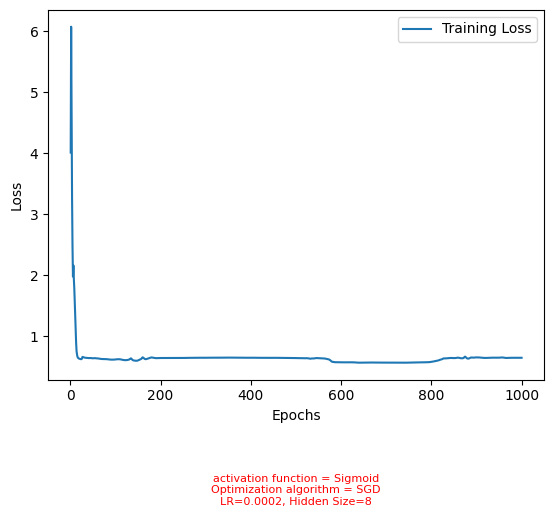

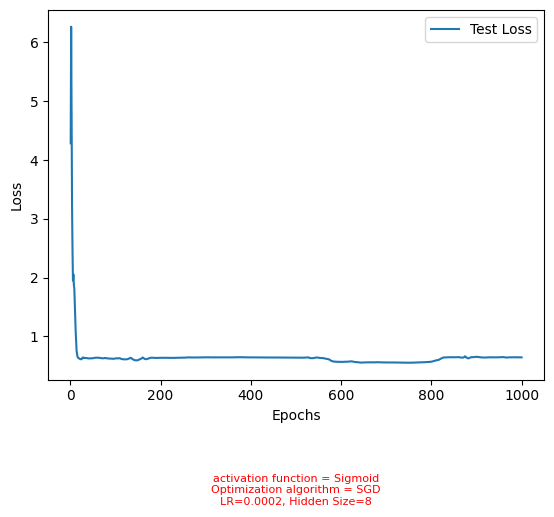

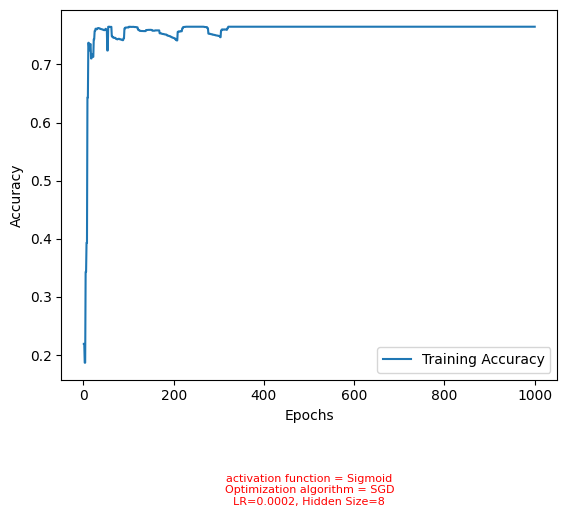

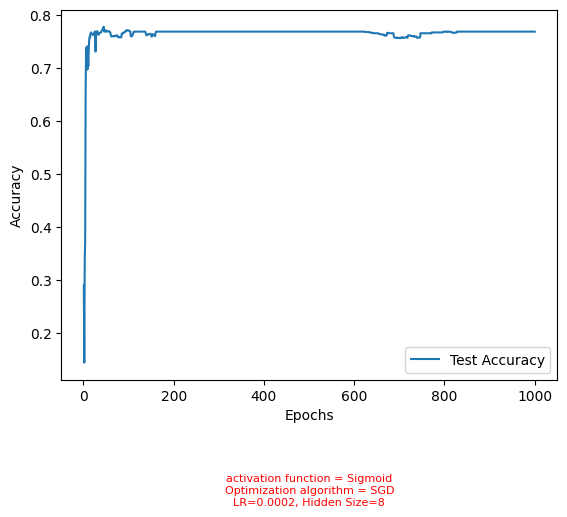

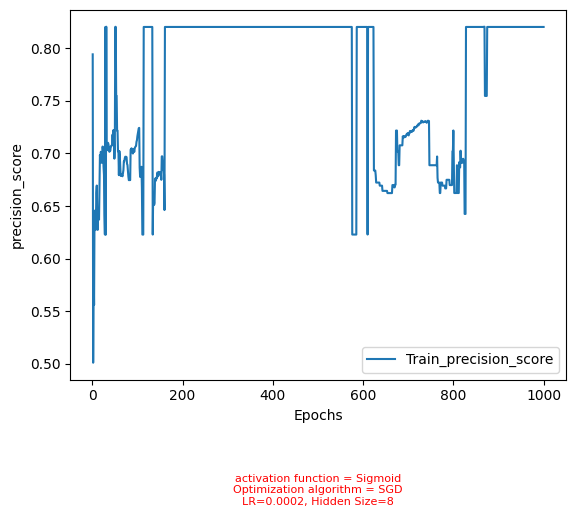

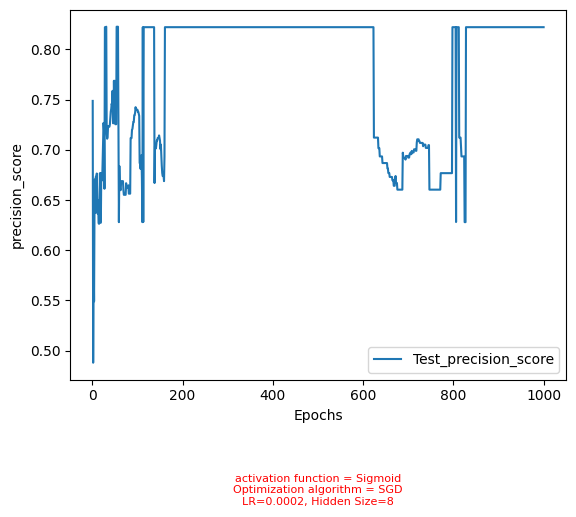

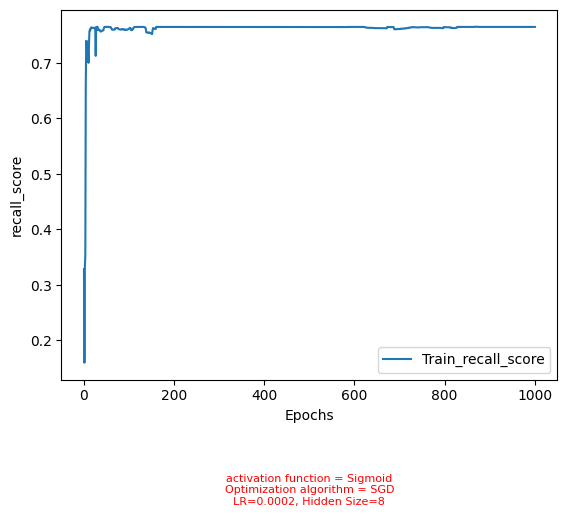

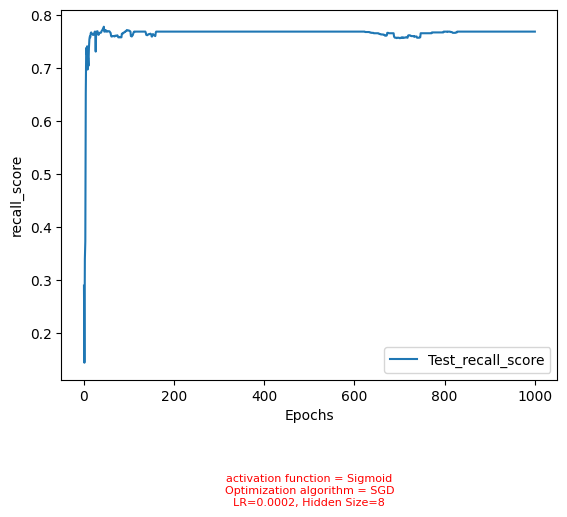

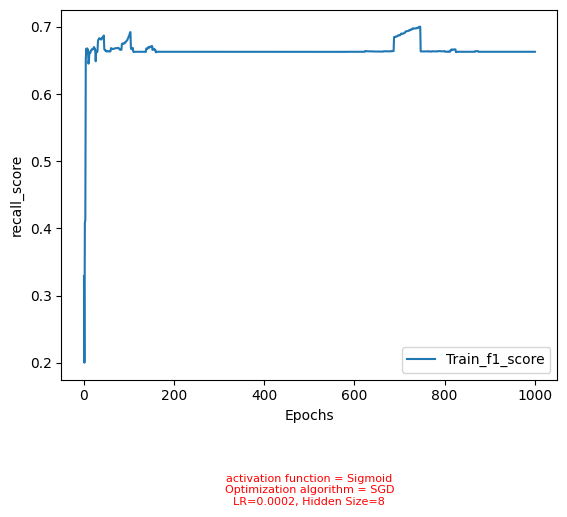

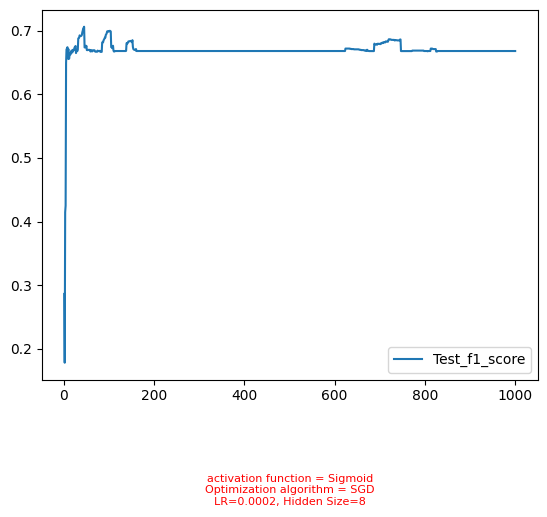

In [ ]:
# Plot Training Loss vs. Epochs
plt.plot(range(1, epochs+1), training_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.annotate('activation function = Sigmoid\nOptimization algorithm = SGD\nLR={}, Hidden Size={}'.format(learning_rate, hidden_size),
             xy=(0.5, -0.2),
             xytext=(0.5, -0.3),
             xycoords='axes fraction',
             textcoords='axes fraction',
             fontsize=8,
             ha='center',
             va='center',
             color='red')

loss_plot_filename = f'/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/RMS Prop/Hidden Layer - sigmiod/training_loss_plot_epochs{epochs}_lr{learning_rate}_Hidden_size{hidden_size}.png'
plt.savefig(loss_plot_filename)
plt.show()

# Plot Test Loss vs. Epochs
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.annotate('activation function = Sigmoid\nOptimization algorithm = SGD\nLR={}, Hidden Size={}'.format(learning_rate, hidden_size),
             xy=(0.5, -0.2),
             xytext=(0.5, -0.3),
             xycoords='axes fraction',
             textcoords='axes fraction',
             fontsize=8,
             ha='center',
             va='center',
             color='red')


loss_plot_filename = f'/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/RMS Prop/Hidden Layer - sigmiod/test_loss_plot_epochs{epochs}_lr{learning_rate}_Hidden_size{hidden_size}.png'
plt.savefig(loss_plot_filename)
plt.show()




# Plot Training Accuracy vs. Epochs
plt.plot(range(1, epochs+1), training_accuracies[:epochs], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.annotate('activation function = Sigmoid\nOptimization algorithm = SGD\nLR={}, Hidden Size={}'.format(learning_rate, hidden_size),
             xy=(0.5, -0.2),
             xytext=(0.5, -0.3),
             xycoords='axes fraction',
             textcoords='axes fraction',
             fontsize=8,
             ha='center',
             va='center',
             color='red')


# Save the plot to a file
accuracy_plot_filename = f'/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/RMS Prop/Hidden Layer - sigmiod/training_accuracy_plot_epochs{epochs}_lr{learning_rate}_Hidden_size{hidden_size}.png'
plt.savefig(accuracy_plot_filename)
plt.show()

# Plot Test Accuracy vs. Epochs
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.annotate('activation function = Sigmoid\nOptimization algorithm = SGD\nLR={}, Hidden Size={}'.format(learning_rate, hidden_size),
             xy=(0.5, -0.2),
             xytext=(0.5, -0.3),
             xycoords='axes fraction',
             textcoords='axes fraction',
             fontsize=8,
             ha='center',
             va='center',
             color='red')


# Save the plot to a file
accuracy_plot_filename = f'/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/RMS Prop/Hidden Layer - sigmiod/test_accuracy_plot_epochs{epochs}_lr{learning_rate}_Hidden_size{hidden_size}.png'
plt.savefig(accuracy_plot_filename)
plt.show()



# Plot train precision_score vs. Epochs
plt.plot(range(1, epochs+1), train_precisions, label='Train_precision_score')
plt.xlabel('Epochs')
plt.ylabel('precision_score')
plt.legend()

plt.annotate('activation function = Sigmoid\nOptimization algorithm = SGD\nLR={}, Hidden Size={}'.format(learning_rate, hidden_size),
             xy=(0.5, -0.2),
             xytext=(0.5, -0.3),
             xycoords='axes fraction',
             textcoords='axes fraction',
             fontsize=8,
             ha='center',
             va='center',
             color='red')


loss_plot_filename = f'/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/RMS Prop/Hidden Layer - sigmiod/train_precision_plot_epochs{epochs}_lr{learning_rate}_Hidden_size{hidden_size}.png'
plt.savefig(loss_plot_filename)
plt.show()

# Plot test precision_score vs. Epochs
plt.plot(range(1, epochs+1), test_precisions, label='Test_precision_score')
plt.xlabel('Epochs')
plt.ylabel('precision_score')
plt.legend()

plt.annotate('activation function = Sigmoid\nOptimization algorithm = SGD\nLR={}, Hidden Size={}'.format(learning_rate, hidden_size),
             xy=(0.5, -0.2),
             xytext=(0.5, -0.3),
             xycoords='axes fraction',
             textcoords='axes fraction',
             fontsize=8,
             ha='center',
             va='center',
             color='red')


loss_plot_filename = f'/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/RMS Prop/Hidden Layer - sigmiod/test_precesion_plot_epochs{epochs}_lr{learning_rate}_Hidden_size{hidden_size}.png'
plt.savefig(loss_plot_filename)
plt.show()


# Plot train recall_score vs. Epochs
plt.plot(range(1, epochs+1), train_recalls, label='Train_recall_score')
plt.xlabel('Epochs')
plt.ylabel('recall_score')
plt.legend()

plt.annotate('activation function = Sigmoid\nOptimization algorithm = SGD\nLR={}, Hidden Size={}'.format(learning_rate, hidden_size),
             xy=(0.5, -0.2),
             xytext=(0.5, -0.3),
             xycoords='axes fraction',
             textcoords='axes fraction',
             fontsize=8,
             ha='center',
             va='center',
             color='red')


loss_plot_filename = f'/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/RMS Prop/Hidden Layer - sigmiod/train_recall_plot_epochs{epochs}_lr{learning_rate}_Hidden_size{hidden_size}.png'
plt.savefig(loss_plot_filename)
plt.show()

# Plot test recall_score vs. Epochs
plt.plot(range(1, epochs+1), test_recalls, label='Test_recall_score')
plt.xlabel('Epochs')
plt.ylabel('recall_score')
plt.legend()

plt.annotate('activation function = Sigmoid\nOptimization algorithm = SGD\nLR={}, Hidden Size={}'.format(learning_rate, hidden_size),
             xy=(0.5, -0.2),
             xytext=(0.5, -0.3),
             xycoords='axes fraction',
             textcoords='axes fraction',
             fontsize=8,
             ha='center',
             va='center',
             color='red')


loss_plot_filename = f'/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/RMS Prop/Hidden Layer - sigmiod/test_recall_plot_epochs{epochs}_lr{learning_rate}_Hidden_size{hidden_size}.png'
plt.savefig(loss_plot_filename)
plt.show()

# Plot train_f1_score vs. Epochs
plt.plot(range(1, epochs+1), train_f1_scores, label='Train_f1_score')
plt.xlabel('Epochs')
plt.ylabel('recall_score')
plt.legend()

plt.annotate('activation function = Sigmoid\nOptimization algorithm = SGD\nLR={}, Hidden Size={}'.format(learning_rate, hidden_size),
             xy=(0.5, -0.2),
             xytext=(0.5, -0.3),
             xycoords='axes fraction',
             textcoords='axes fraction',
             fontsize=8,
             ha='center',
             va='center',
             color='red')


loss_plot_filename = f'/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/RMS Prop/Hidden Layer - sigmiod/train_f1_plot_epochs{epochs}_lr{learning_rate}_Hidden_size{hidden_size}.png'
plt.savefig(loss_plot_filename)
plt.show()

# Plot test_f1_score vs. Epochs
plt.plot(range(1, epochs+1), train_f1_scores, label='Train_f1_score')
plt.legend()

plt.annotate('activation function = Sigmoid\nOptimization algorithm = SGD\nLR={}, Hidden Size={}'.format(learning_rate, hidden_size),
             xy=(0.5, -0.2),
             xytext=(0.5, -0.3),
             xycoords='axes fraction',
             textcoords='axes fraction',
             fontsize=8,
             ha='center',
             va='center',
             color='red')


loss_plot_filename = f'/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/RMS Prop/Hidden Layer - sigmiod/test_f1_plot_epochs{epochs}_lr{learning_rate}_Hidden_size{hidden_size}.png'
plt.savefig(loss_plot_filename)
plt.show()



---

Plots when TanH is used...

---



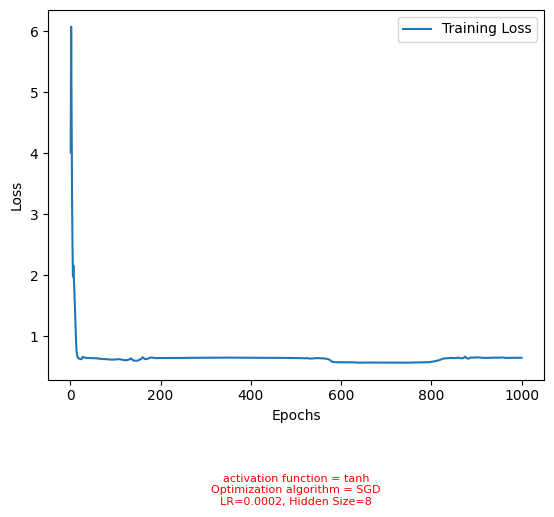

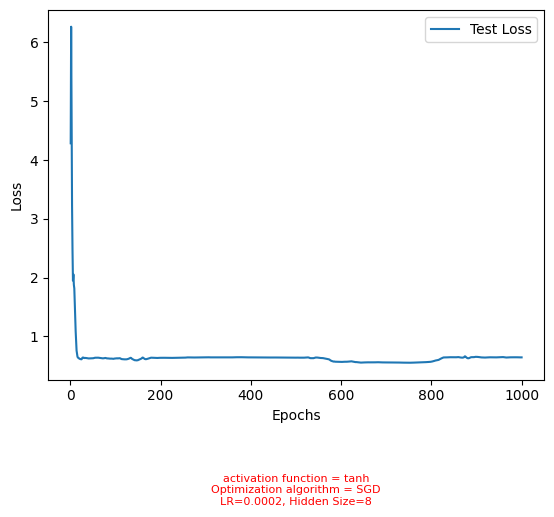

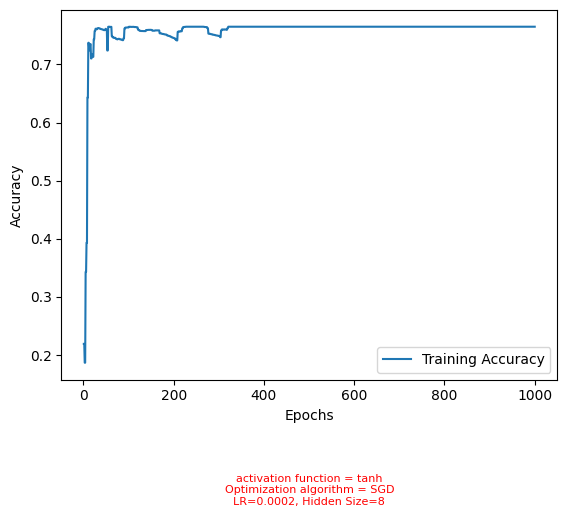

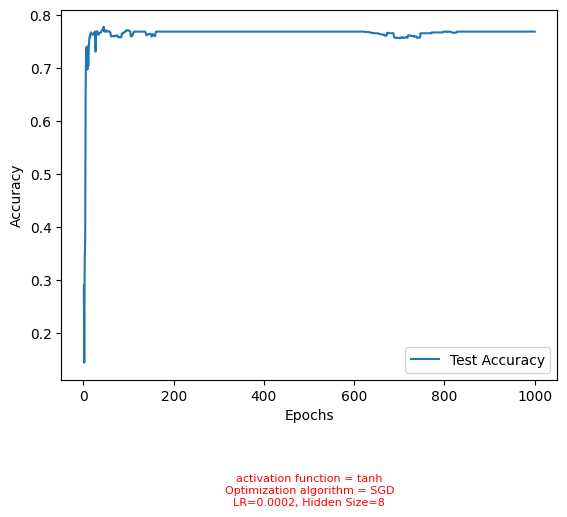

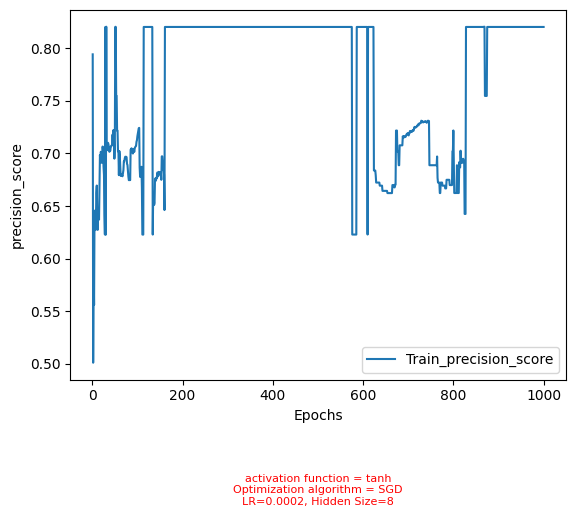

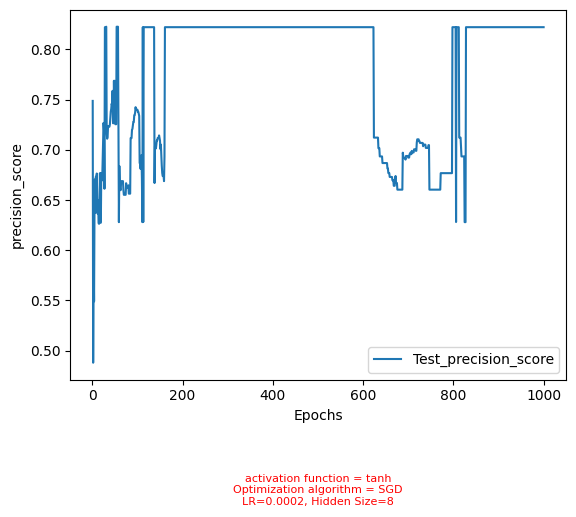

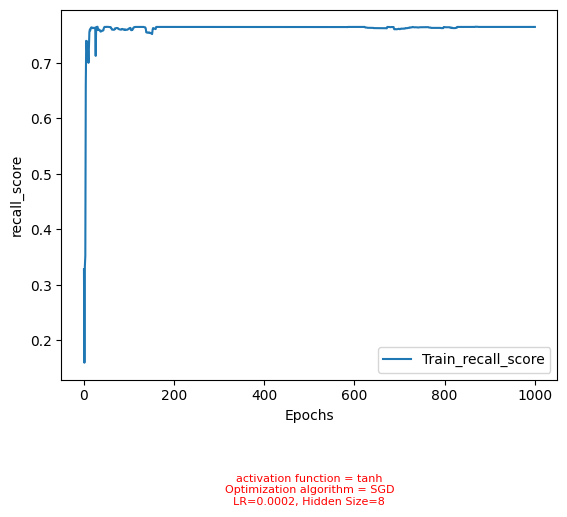

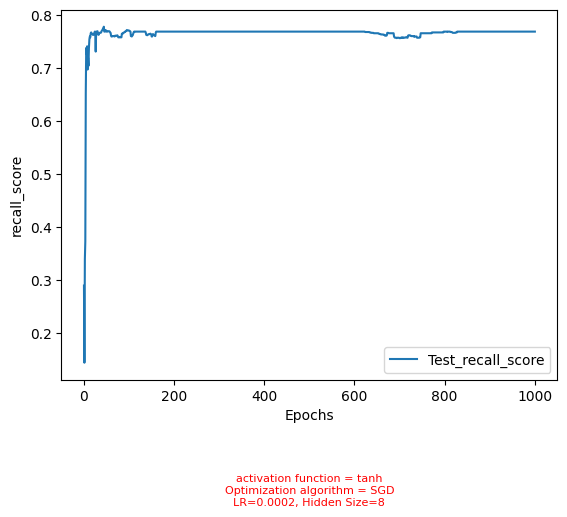

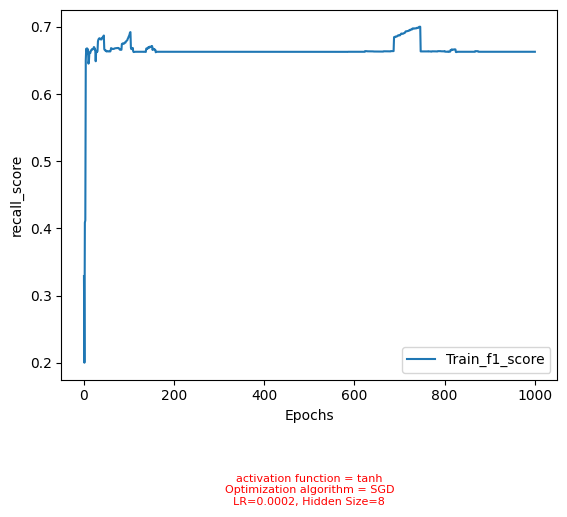

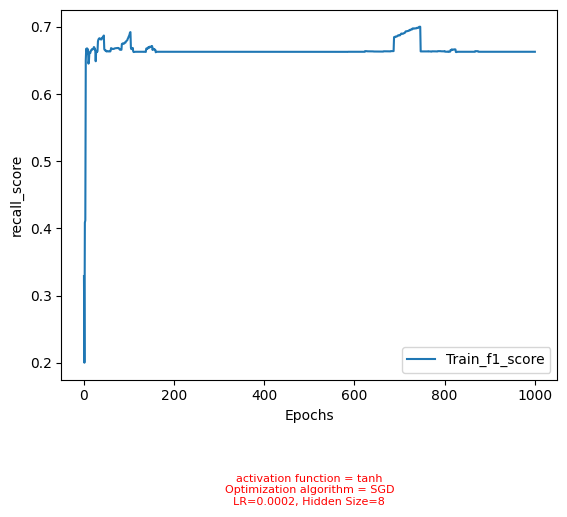

In [ ]:
# Plot Training Loss vs. Epochs
plt.plot(range(1, epochs+1), training_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.annotate('activation function = tanh\nOptimization algorithm = SGD\nLR={}, Hidden Size={}'.format(learning_rate, hidden_size),
             xy=(0.5, -0.2),
             xytext=(0.5, -0.3),
             xycoords='axes fraction',
             textcoords='axes fraction',
             fontsize=8,
             ha='center',
             va='center',
             color='red')


loss_plot_filename = f'/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/RMS Prop/Hidden Layer  - tanh/training_loss_plot_epochs{epochs}_lr{learning_rate}_Hidden_size{hidden_size}.png'
plt.savefig(loss_plot_filename)
plt.show()

# Plot Test Loss vs. Epochs
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.annotate('activation function = tanh\nOptimization algorithm = SGD\nLR={}, Hidden Size={}'.format(learning_rate, hidden_size),
             xy=(0.5, -0.2),
             xytext=(0.5, -0.3),
             xycoords='axes fraction',
             textcoords='axes fraction',
             fontsize=8,
             ha='center',
             va='center',
             color='red')


loss_plot_filename = f'/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/RMS Prop/Hidden Layer  - tanh/test_loss_plot_epochs{epochs}_lr{learning_rate}_Hidden_size{hidden_size}.png'
plt.savefig(loss_plot_filename)
plt.show()




# Plot Training Accuracy vs. Epochs
plt.plot(range(1, epochs+1), training_accuracies[:epochs], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.annotate('activation function = tanh\nOptimization algorithm = SGD\nLR={}, Hidden Size={}'.format(learning_rate, hidden_size),
             xy=(0.5, -0.2),
             xytext=(0.5, -0.3),
             xycoords='axes fraction',
             textcoords='axes fraction',
             fontsize=8,
             ha='center',
             va='center',
             color='red')


# Save the plot to a file
accuracy_plot_filename = f'/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/RMS Prop/Hidden Layer  - tanh/training_accuracy_plot_epochs{epochs}_lr{learning_rate}_Hidden_size{hidden_size}.png'
plt.savefig(accuracy_plot_filename)
plt.show()

# Plot Test Accuracy vs. Epochs
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.annotate('activation function = tanh\nOptimization algorithm = SGD\nLR={}, Hidden Size={}'.format(learning_rate, hidden_size),
             xy=(0.5, -0.2),
             xytext=(0.5, -0.3),
             xycoords='axes fraction',
             textcoords='axes fraction',
             fontsize=8,
             ha='center',
             va='center',
             color='red')


# Save the plot to a file
accuracy_plot_filename = f'/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/RMS Prop/Hidden Layer  - tanh/test_accuracy_plot_epochs{epochs}_lr{learning_rate}_Hidden_size{hidden_size}.png'
plt.savefig(accuracy_plot_filename)
plt.show()



# Plot train precision_score vs. Epochs
plt.plot(range(1, epochs+1), train_precisions, label='Train_precision_score')
plt.xlabel('Epochs')
plt.ylabel('precision_score')
plt.legend()

plt.annotate('activation function = tanh\nOptimization algorithm = SGD\nLR={}, Hidden Size={}'.format(learning_rate, hidden_size),
             xy=(0.5, -0.2),
             xytext=(0.5, -0.3),
             xycoords='axes fraction',
             textcoords='axes fraction',
             fontsize=8,
             ha='center',
             va='center',
             color='red')


loss_plot_filename = f'/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/RMS Prop/Hidden Layer  - tanh/train_precsion_plot_epochs{epochs}_lr{learning_rate}_Hidden_size{hidden_size}.png'
plt.savefig(loss_plot_filename)
plt.show()

# Plot test precision_score vs. Epochs
plt.plot(range(1, epochs+1), test_precisions, label='Test_precision_score')
plt.xlabel('Epochs')
plt.ylabel('precision_score')
plt.legend()

plt.annotate('activation function = tanh\nOptimization algorithm = SGD\nLR={}, Hidden Size={}'.format(learning_rate, hidden_size),
             xy=(0.5, -0.2),
             xytext=(0.5, -0.3),
             xycoords='axes fraction',
             textcoords='axes fraction',
             fontsize=8,
             ha='center',
             va='center',
             color='red')


loss_plot_filename = f'/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/RMS Prop/Hidden Layer  - tanh/test_precision_plot_epochs{epochs}_lr{learning_rate}_Hidden_size{hidden_size}.png'
plt.savefig(loss_plot_filename)
plt.show()


# Plot train recall_score vs. Epochs
plt.plot(range(1, epochs+1), train_recalls, label='Train_recall_score')
plt.xlabel('Epochs')
plt.ylabel('recall_score')
plt.legend()

plt.annotate('activation function = tanh\nOptimization algorithm = SGD\nLR={}, Hidden Size={}'.format(learning_rate, hidden_size),
             xy=(0.5, -0.2),
             xytext=(0.5, -0.3),
             xycoords='axes fraction',
             textcoords='axes fraction',
             fontsize=8,
             ha='center',
             va='center',
             color='red')

loss_plot_filename = f'/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/RMS Prop/Hidden Layer  - tanh/test_recall_plot_epochs{epochs}_lr{learning_rate}_Hidden_size{hidden_size}.png'
plt.savefig(loss_plot_filename)
plt.show()

# Plot test recall_score vs. Epochs
plt.plot(range(1, epochs+1), test_recalls, label='Test_recall_score')
plt.xlabel('Epochs')
plt.ylabel('recall_score')
plt.legend()

plt.annotate('activation function = tanh\nOptimization algorithm = SGD\nLR={}, Hidden Size={}'.format(learning_rate, hidden_size),
             xy=(0.5, -0.2),
             xytext=(0.5, -0.3),
             xycoords='axes fraction',
             textcoords='axes fraction',
             fontsize=8,
             ha='center',
             va='center',
             color='red')


loss_plot_filename = f'/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/RMS Prop/Hidden Layer  - tanh/train_recall_plot_epochs{epochs}_lr{learning_rate}_Hidden_size{hidden_size}.png'
plt.savefig(loss_plot_filename)
plt.show()

# Plot train_f1_score vs. Epochs
plt.plot(range(1, epochs+1), train_f1_scores, label='Train_f1_score')
plt.xlabel('Epochs')
plt.ylabel('recall_score')
plt.legend()

plt.annotate('activation function = tanh\nOptimization algorithm = SGD\nLR={}, Hidden Size={}'.format(learning_rate, hidden_size),
             xy=(0.5, -0.2),
             xytext=(0.5, -0.3),
             xycoords='axes fraction',
             textcoords='axes fraction',
             fontsize=8,
             ha='center',
             va='center',
             color='red')


loss_plot_filename = f'/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/RMS Prop/Hidden Layer  - tanh/train_f1_plot_epochs{epochs}_lr{learning_rate}_Hidden_size{hidden_size}.png'
plt.savefig(loss_plot_filename)
plt.show()

# Plot test_f1_score vs. Epochs
plt.plot(range(1, epochs+1), train_f1_scores, label='Train_f1_score')
plt.xlabel('Epochs')
plt.ylabel('recall_score')
plt.legend()

plt.annotate('activation function = tanh\nOptimization algorithm = SGD\nLR={}, Hidden Size={}'.format(learning_rate, hidden_size),
             xy=(0.5, -0.2),
             xytext=(0.5, -0.3),
             xycoords='axes fraction',
             textcoords='axes fraction',
             fontsize=8,
             ha='center',
             va='center',
             color='red')


loss_plot_filename = f'/content/drive/MyDrive/Neural Network Soft Computing Assignment/Plots/RMS Prop/Hidden Layer  - tanh/test_f1_plot_epochs{epochs}_lr{learning_rate}_Hidden_size{hidden_size}.png'
plt.savefig(loss_plot_filename)
plt.show()